<a href="https://colab.research.google.com/github/JohnKang0720/FIFA/blob/main/STAT_201_Project_(FIFA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Inference regarding Performance/Statistics of Soccer players.**

**Members**: John Kang, Pedro Moretzshon Aaron Wang, Briana Pavey (Group 30)

# 1. Introduction

Statistical inference on athletes regarding their in-game stats happen on a daily basis by sport statisticians and is a significant factor that improves the quality of their performances through discovery of certain patterns and weaknesses with data analysis. For this report, we want to find a specific pattern that could possibly create a positive effect towards sport teams.

For a long time, there has been a debate whether or not left-footed players are more offensively skilled than right-footed players. To settle this, we will use statistical inference. Specifically, we will be using statistical inference methods to see the behavioral patterns of FIFA athletes: Does the preferred foot of attacking players affect dribbling, passing and shooting skills?

The dataset for this report is a FIFA 2017 Dataset from Kaggle -- a reliable dataset company -- consisting of 17,000 players along with 50+ attributes such as their overall ratings, personal information (names, age) and their associated team in the Fifa League.
We will be using the following columns:



*   ```preferred_foot```: Preferred foot of the player (left or right).
*   ```skill_dribbling```: Dribbling rating/How good the player dribbles.
*   ```passing```: Pass rating/How good the player passes.
*   ```skill_fk_accuracy```: Shooting accuracy.

This report will calculate the **mean differences** of the response variables: ```skill_dribbling```, ```passing```, ```skill_fk_accuracy``` as well as the **standard deviation** to see if the effect of ```preferred_foot``` is statistically significant. We chose to use the mean and standard deviation because the plots below are approximately normally distributed with almost no outliers. Hence, mean and SD would be accurate measures of center and spread respectively. We are only focusing on offensive players as they are more likely to have all three of the above statistics, whereas a goal-keeper or defender would not have any shooting stats.

We will also explore other statistics like quantiles and variances of the variables between left-foot and right-foot attackers to explore the spread of the bootstrap distributions (See Preliminary Results for this exploration).

**Method of Test:** We will use the ```infer``` package (to generate null distributions for each response variables and calculate the p-values) to conduct hypothesis test FOR EACH OF THE VARIABLES (```passing```, ```skill_dribbling```, and ```skill_fk_accuracy```) with the null hypothesis (H0) being that
```preferred_foot```
has no effect on performance and the alternative hypothesis (H1) being that there IS an effect. Hence, we are using the two-sample t-test to compare the mean differences of ```passing```, ```skill_dribbling```, and ```skill_fk_accuracy``` between 2 groups and calculate the p-value using the t-distribution.

$$H_0: \mu_1 - \mu_2 = 0$$ $$vs$$ $$H_1: \mu_1 - \mu_2 \neq 0$$,
where $\mu_1$: mean of EACH of the ```passing```, ```skill_dribbling```, and ```skill_fk_accuracy``` for right-footed attackers and  $\mu_2$: mean of each skills of the left-footed attackers.
The same hypothesis test will also be conducted for the SCALE parameter -- standard deviation.

$$H_0: \sigma_1 - \sigma_2 = 0$$ $$vs$$ $$H_1: \sigma_1 - \sigma_2 \neq 0$$

Ideally, given that the $H_0$ is rejected for the *mean differences*, the p-value for the t-statistic on the null distribution (t-distribution) between left and right footed players for *standard deviation* should be 0. This is because deviations between the data points for left and right players should not be too high, otherwise it is hard to distinguish the skill differences between left and right players.

<h2> 2. Preliminary Data Analysis </h2>

Through this analysis, we will demonstrate how the data can be imported and cleaned, summarized into useful information and visualized with distinct colors representing different severity.

**Important Note:** We are treating the dataset as the "population" and we will begin the preliminary data analysis by taking A SINGLE sample. This is because the population contains absolutely ALL the players' dataset in 2017, which it makes sense to be the population.

**Required Packages/Libraries:**
- moderndive
- infer
- tidyverse
- repr
- ggplot2

In [52]:
#Download required libraries
install.packages("moderndive")
install.packages("infer")

library(tidyverse)
library(repr)
library(ggplot2)
library(moderndive)
library(infer)

Warning message:
"package 'moderndive' is in use and will not be installed"
Warning message:
"package 'infer' is in use and will not be installed"


<h4> Reading & Cleaning/Wrangling Data </h4>

In [53]:
#Reading data from web

fifa_pop <- read_csv("https://raw.githubusercontent.com/rashida048/Datasets/master/fifa.csv")

#SELECT used columns and remove all NA values (since goalkeepers don't pass, they have NA for some columns).
#FILTER attack positions only.
fifa_tidy <- fifa_pop |>
             filter(team_position == "LW" | team_position == "RW" | team_position == "ST" | team_position == "CF") |>
             filter(!is.na(skill_dribbling)) |>
             filter(!is.na(passing)) |>
             filter(!is.na(skill_fk_accuracy)) |>
             select(short_name, overall, team_position, preferred_foot, skill_dribbling, passing, skill_fk_accuracy) |>
             arrange(desc(overall))

head(fifa_tidy)

New names:
• `` -> `...1`
Rows: 16155 Columns: 81
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (16): player_url, short_name, long_name, nationality, club_name, league...
dbl  (61): ...1, sofifa_id, age, height_cm, weight_kg, league_rank, overall,...
lgl   (2): release_clause_eur, mentality_composure
date  (2): dob, joined

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


short_name,overall,team_position,preferred_foot,skill_dribbling,passing,skill_fk_accuracy
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
L. Messi,93,CF,Left,96,86,90
Cristiano Ronaldo,92,LW,Right,93,81,79
Z. Ibrahimović,90,ST,Right,88,81,80
G. Bale,87,RW,Left,87,83,85
Neymar,86,LW,Right,94,72,78
S. Agüero,86,ST,Right,89,77,72


<h4> Taking a single sample from population </h4>

In [54]:
set.seed(1000)
single_sample_fifa <- fifa_tidy |>
                      rep_sample_n(size = 200)
single_sample_fifa

replicate,short_name,overall,team_position,preferred_foot,skill_dribbling,passing,skill_fk_accuracy
<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,D. Pecirep,57,ST,Right,56,35,24
1,D. Brown,68,ST,Right,66,48,28
1,L. Valencia,70,RW,Right,68,71,74
1,D. Welbeck,78,ST,Right,80,71,61
1,Kim Seung Dae,67,ST,Right,69,63,39
1,L. de Sa,68,RW,Right,74,57,42
1,O. Damari,67,ST,Left,69,60,56
1,L. Clarke,66,ST,Right,58,54,64
1,F. Borja,66,ST,Right,63,61,57


<h4> Proportion of Left vs Right footed soccer players </h4>

In [55]:
player_count <- single_sample_fifa |>
                group_by(preferred_foot) |>
                summarize(count = n()) |>
                mutate(proportion = count / nrow(single_sample_fifa)) |>
                select(-count)
player_count

preferred_foot,proportion
<chr>,<dbl>
Left,0.185
Right,0.815


<h4> Overall Skills for All Attackers </h4>

In [56]:
stats_pos <- function(pos) {
    stats <- single_sample_fifa |>
            filter(team_position == pos) |>
            select(-short_name, -preferred_foot, -team_position) |>
            map_df(mean, na.rm = TRUE) |>
            mutate(position = c(pos))
    return (stats)
}

average_stats_lw <- stats_pos("LW")

average_stats_rw <- stats_pos("RW")

average_stats_st <- stats_pos("ST")

average_stats_cf <- stats_pos("CF")

combined_stats <- bind_rows(average_stats_lw, average_stats_rw, average_stats_st, average_stats_cf)
combined_stats

replicate,overall,skill_dribbling,passing,skill_fk_accuracy,position
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,68.88889,72.36111,62.77778,58.27778,LW
1,68.21622,71.00000,60.32432,56.91892,RW
1,68.19048,64.78571,54.96825,48.26984,ST
1,78.00000,84.00000,70.00000,66.00000,CF


<h4> Overall Rating for Left vs Right Attackers </h4>

In [57]:
each_foot_stats <- single_sample_fifa |>
              select(-short_name, -overall) |>
              group_by(preferred_foot, team_position) |>
              summarize(skill_score = mean(passing+skill_fk_accuracy+skill_dribbling))

each_foot_stats

`summarise()` has grouped output by 'preferred_foot'. You can override using
the `.groups` argument.


preferred_foot,team_position,skill_score
<chr>,<chr>,<dbl>
Left,LW,192.3846
Left,RW,206.6250
Left,ST,169.5625
Right,CF,220.0000
Right,LW,194.0000
Right,RW,183.1724
Right,ST,167.8000


<h4> Best Left vs Right Attackers </h4>

In [58]:
select_best <- function(pf) {
    best_foot <- single_sample_fifa |>
                 select(short_name, preferred_foot, overall) |>
                  filter(preferred_foot == pf)
    return (best_foot)
}
# selecting the best right-footed player
best_right <- select_best("Right") |>
              filter(overall == max(overall))
# selecting the best left-footed player
best_left <- select_best("Left") |>
              filter(overall == max(overall))

rbind(best_right, best_left)

Adding missing grouping variables: `replicate`
Adding missing grouping variables: `replicate`


replicate,short_name,preferred_foot,overall
<int>,<chr>,<chr>,<dbl>
1,S. Agüero,Right,86
1,G. Bale,Left,87


<h4> Left vs Right Player Skills Table (Estimate of the parameter) </h4>

In [59]:
#point estimate
diff_left_right <- single_sample_fifa |>
                   select(preferred_foot, passing,skill_fk_accuracy,skill_dribbling) |>
                   group_by(preferred_foot) |>
                   summarize(avg_passing = mean(passing),
                             avg_shooting = mean(skill_fk_accuracy),
                             avg_dribbling = mean(skill_dribbling),
                             sd_passing = sd(passing),
                             sd_shooting = sd(skill_fk_accuracy),
                             sd_dribbling = sd(skill_dribbling),
                             median_passing = median(passing),
                             median_shooting = median(skill_fk_accuracy),
                             median_dribbling = median(skill_dribbling),
                             upper_quantile_passing = quantile(passing, 0.75),
                             upper_quantile_shooting = quantile(skill_fk_accuracy, 0.75),
                             upper_quantile_dribbling = quantile(skill_dribbling, 0.75),
                             n = n()
                             ) |>
                      pivot_longer(cols=c(-preferred_foot), names_to = "Skill Statistics", values_to = "Value") |>
                      pivot_wider(names_from = preferred_foot, values_from = c(Value))

diff_left_right

Adding missing grouping variables: `replicate`


Skill Statistics,Left,Right
<chr>,<dbl>,<dbl>
avg_passing,59.891892,56.883436
avg_shooting,57.243243,50.515337
avg_dribbling,68.459459,67.153374
sd_passing,9.576545,8.927273
sd_shooting,13.734396,13.341366
sd_dribbling,9.038789,7.671160
median_passing,60.000000,58.000000
median_shooting,58.000000,49.000000
median_dribbling,70.000000,68.000000


# <h4> Plot addressing the question </h4>

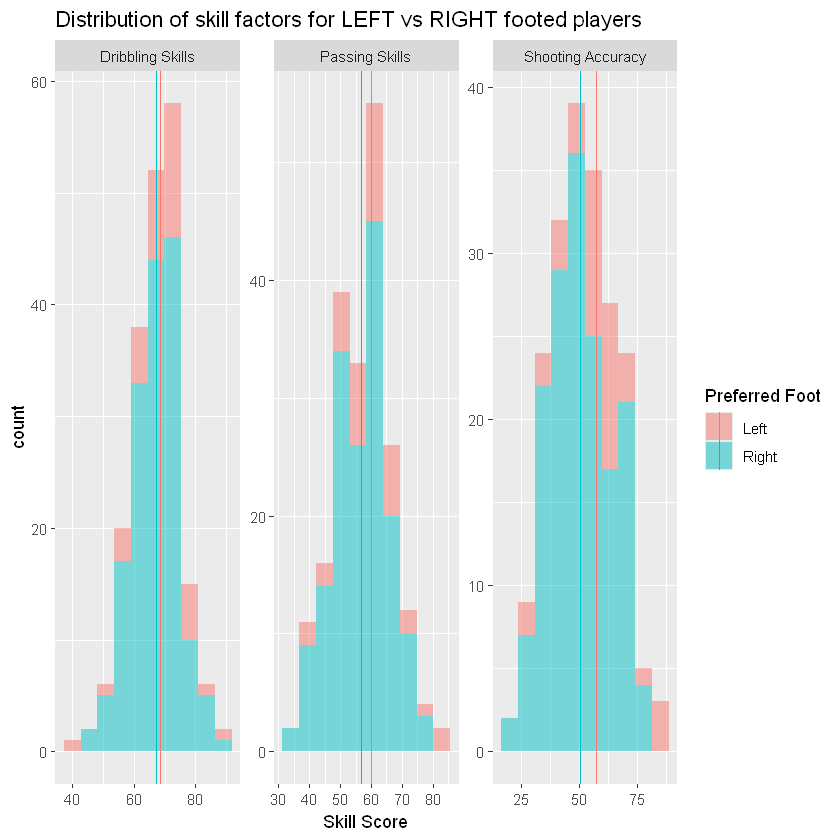

In [60]:
#plot of players
stats_data_parsed = single_sample_fifa |>
              mutate(shooting_accuracy = skill_fk_accuracy,
                     dribbling_skills = skill_dribbling,
                     passing_skills = passing) |>
              select(replicate, preferred_foot, shooting_accuracy, dribbling_skills, passing_skills) |>
              pivot_longer(cols=c(shooting_accuracy, dribbling_skills, passing_skills), names_to = "stat", values_to = "values")
mean_data_parsed = single_sample_fifa |> group_by(preferred_foot) |>
              summarize(shooting_accuracy = mean(skill_fk_accuracy),
                     dribbling_skills = mean(skill_dribbling),
                     passing_skills = mean(passing)) |>
              select(preferred_foot, shooting_accuracy, dribbling_skills, passing_skills) |>
              pivot_longer(cols=c(shooting_accuracy, dribbling_skills, passing_skills), names_to = "stat", values_to = "values")
stats_plot <- stats_data_parsed |>
              ggplot() +
              geom_histogram(aes(x = values, fill=preferred_foot), bins = 10, alpha = 0.5) +
              geom_vline(aes(xintercept = values, colour = preferred_foot), data = mean_data_parsed |> group_by(stat)) +
               facet_wrap(vars(stat), scales = "free", labeller = as_labeller(c(dribbling_skills = "Dribbling Skills", shooting_accuracy = "Shooting Accuracy", passing_skills = "Passing Skills"))) +
              labs(x = "Skill Score", fill = "Preferred Foot", colour = "Preferred Foot", title = "Distribution of skill factors for LEFT vs RIGHT footed players")


stats_plot

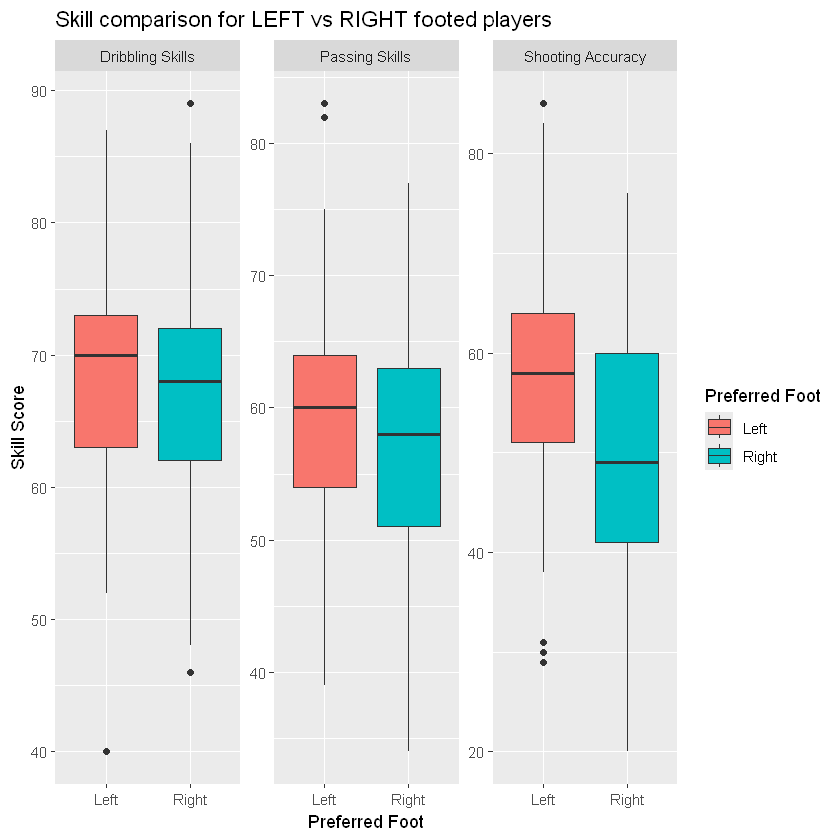

In [61]:
stats_boxplot <- stats_data_parsed |>
              ggplot() +
              geom_boxplot(aes(x = preferred_foot, y=values, fill = preferred_foot)) +
              facet_wrap(vars(stat), scales = "free", labeller = as_labeller(c(dribbling_skills = "Dribbling Skills", shooting_accuracy = "Shooting Accuracy", passing_skills = "Passing Skills"))) +
              labs(x = "Preferred Foot", y = "Skill Score", fill = "Preferred Foot", title = "Skill comparison for LEFT vs RIGHT footed players")
stats_boxplot

The above plots help visualize the point estimate that we will use to make the conclusion to our inferential question about performances of left-footed and right-footed players.

Seeing the skills of left-footed and right-footed players roughly overlap in the histogram suggests that the difference in skill factors between the ```preferred_foot``` are not clear on a visible scale, however we do see the average of the left-foot skill score being consistently higher across the different skillsets by a small amount.

The non-overlapping part in each of the histograms allows us to assume that the dominant foot of players DOES affect their performance, but we need more evidence to determine whether it is a significant difference.

In order to verify this assumption, we need more evidence to either support or reject the claim. It is also wise to take into account the difference in number of observations in left and right foot players.

The boxplot also shows that left players have a higher median but we cannot confidently conclude that majority of left-footed players are better due to the spread.

<h2> 3. Methods: Plan </h2>



The report of the preliminary results is trustworthy as the sample is taken randomly, with an effective size (> 30 for the CLT assumptions to be satisfied) and representative of the population with proportional number of left-footed and right-footed soccer players. Hence, the analysis of the sample, as well as its visualization are good estimates that there could be a correlation between ```preferred_foot``` and the performances of each player.

However, the preliminary results are not reliable enough to support the claim. While the sample is representative and could possibly make a plausible estimation, we have no evidence how much standard error and sampling variation the population distribution has. Hence, there is a decent chance that the 200 observations in the sample could have many outliers that deviates from the parameter. Moreover, in real life scenarios, the stakeholder ideally would need extremely reliable values derived from the inferences that we are making. Hence, giving them a single estimator would not be ideal. From the preliminary results, we have not supported our estimation with confidence interval or hypothesis testing to see if the differences between left and right footed players' performances are truly different. Therefore, we would need to present a RANGE of values along with tests.

To overcome this issue, our solution is as follows:
**Plan:**
1. Use bootstrapping to resample from the original sample to create 3 different bootstrap distribution of the **mean** difference between each of the 3 skill sets: passing, shooting and dribbling abilities which indicate the ideal strengths as an attacker.

  **Asymptotics/CLT Method:** We will use both Bootstrapping from resamples and the CLT method to create a confidence interval, compare and contrast their charactersitics and produce plausible range of values of mean differences of
```skill_dribbling ```,
```passing```,
```skill_fk_accuracy```
for left and right footed players using CI. We will also generalize limitations & advantages for each methods.

2. From the bootstraps, we will create 3 confidence intervals for each distributions so that we do not present a single estimate for a stakeholder but a plausible range of values with varying degrees of confidence.

3. Compare and contrast the confidence intervals from each methods and list some key properties of each methods.

3. Conduct two-sample T-test for each skill mean differences as well as one-sample t-test for standard deviation for left-foot and right-foot players to see if our claim regarding ```preferred_foot``` affecting the players' performances hold true. We will set the significance level at 0.05. This threshold is stringent enough to limit the probability of a Type I error (falsely claiming a significant difference when there is none) to a reasonably low level, thus enhancing the reliability of our conclusions. A p-value lower than 0.05 will be required to reject the null hypothesis in favour of the alternative, suggesting a statistically significant difference between the performances of left and right footed players. This is to practically ensure that the differences are statistically significant and can occur. Specifically, since we are conducting this report in a **realistic** situation and assuming that we do not know the sigma, we can use the two-sample t-test with a decent level of degree of freedom to test that the mean differences exist. We do not need to rely completely on CLT since our distribution is normal.

4. Plot visualizations for the 3 hypothesis tests above and summarize the statistics to derive a meaningful conclusion. Finally, list which steps clearly show the differences between left-footed and right-footed players.


---



<h3> Expected Findings </h3>
Through this report, we expect to find that the skill difference between left-footed and right-footed players really exists.
With the sport being mostly dominated by right-footed players, left-footed players have been difficult to play against for defenders. Hence, left-footed players usually have very high passing and playmaking skills as attackers. There are many right-footed players however, who are consistent at scoring such as Ronaldo. These facts gives us a good expectations of the differences between the explanatory variable and is hoped to be proven. We also expect to create well-constructed visualizations of confidence intervals, hypothesis testing as well as other outputs from different tests that clearly come to a consensus towards the inferential question.

<h3> Impact </h3>
Finding the answer to the inferential question regarding the skills and behavioural patterns of players will have a signficant impact towards the competitive Soccer community. Soccer games are analyzed and defenders are told to strategically mark and defend the attackers. Hence, finding that left-footed players have strong passing skills while right-footed players have strong dribbling skills compared to left-footed players with sufficient evidence would help the coaches in the Soccer community prepare to defend such attackers (e.g. IF left-footed players are found to be very good at passing, the coach could set up 2 defenders to merge against the left-footed players to prevent passes) which would make the game even more competitive and help develop creative strategies for the teams.

<h3> Future Questions </h3>
There could be infinitely many questions regarding the analysis of playing styles.
Further questions can be regarding:


1. Do the differences the playing styles of between left-footed vs right-footed defenders exist?
2. Do age, height, weight or even nationality affect the overall ranking across all positions?
3. Does taking more samples change the results? What if there were equal proportions of left-footed and right-footed players? Would the results differ in terms of CI and p-value?

Moreover, there could be further research questions to see if other variables such as age, height, weight or even nationality affects playing styles.

## Bootstrap Distributions of Differences in Average Stats

In [62]:
# Helper function for bootstrap sampling
bootstrap_sample <- function(data, response_var, reps = 2000) {
  data |>
    specify(formula = as.formula(paste(response_var, "~ preferred_foot"))) |>
    generate(reps = reps, type = "bootstrap") |>
    calculate(stat = "diff in means", order = c("Right", "Left"))
}

bst_samples_passing <- bootstrap_sample(single_sample_fifa, "passing")
bst_samples_dribbling <- bootstrap_sample(single_sample_fifa, "skill_dribbling")
bst_samples_shooting <- bootstrap_sample(single_sample_fifa, "skill_fk_accuracy")


# bootstrap_stats_per_foot <- bst_samples %>%
#     group_by(replicate...1, preferred_foot) %>%
#     summarise(avg_dribbling = mean(skill_dribbling),
#            avg_passing = mean(passing),
#            avg_fk_accuracy = mean(skill_fk_accuracy)) %>%
#     pivot_longer(cols=c(-preferred_foot, -replicate...1), names_to = "skill_stats", values_to = "Value") %>%
#     pivot_wider(names_from = preferred_foot, values_from = c(Value))

# mean_LR_diff <- bootstrap_stats_per_foot %>%
#     mutate(lr_diff = Right - Left) %>%
#     group_by(skill_stats) %>%
#     mutate(mean_lr_diff = mean(Right)-mean(Left)) %>%
#     select(-Left, -Right)

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


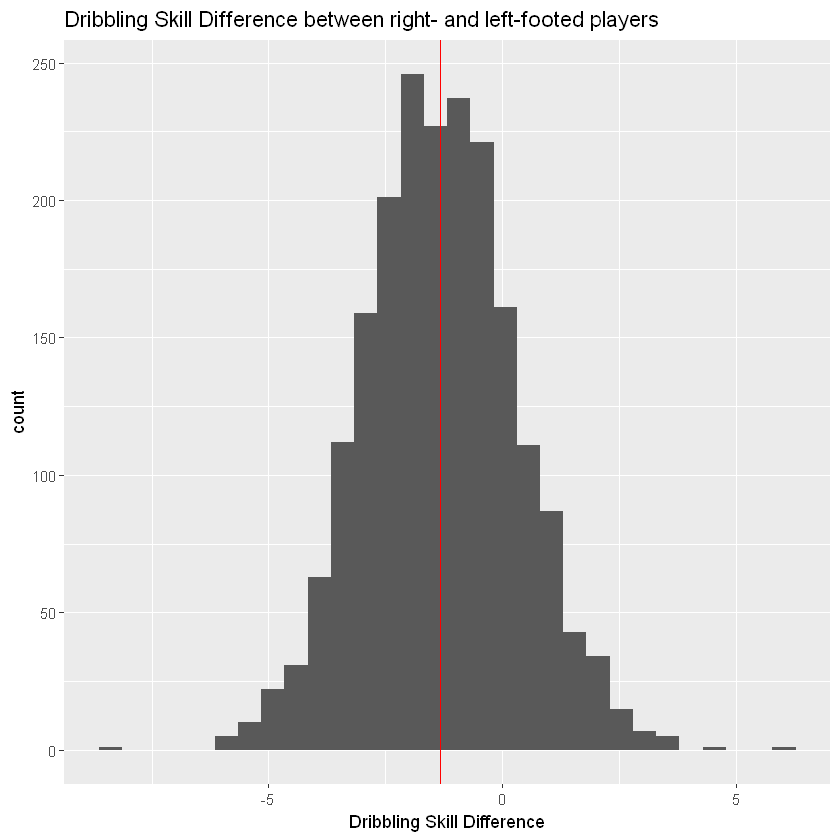

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


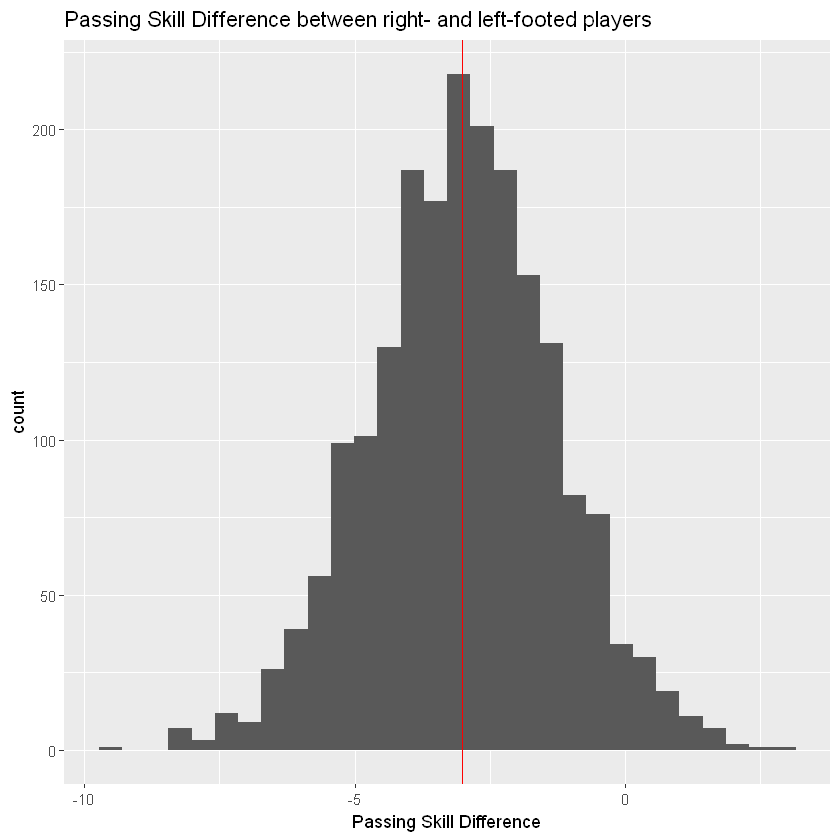

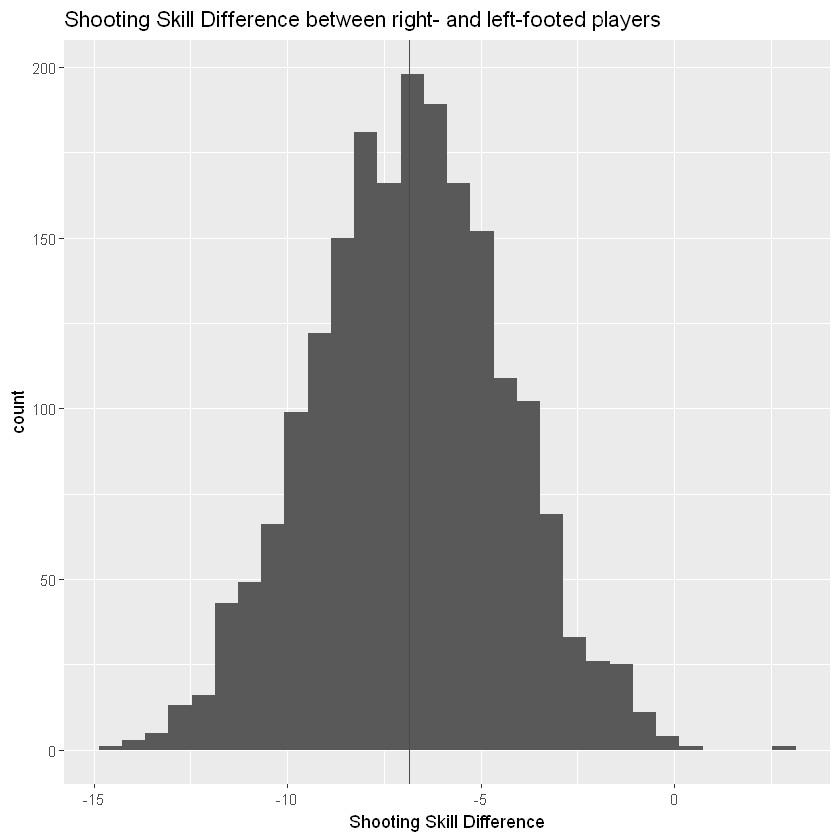

In [63]:

# Helper function for LR difference plots
plot_lr_diff <- function(bst_samples, skill_name) {
  plot <- bst_samples |>
    ggplot() +
    geom_histogram(aes(x = stat)) +
    geom_vline(xintercept = mean(bst_samples$stat), color = "red") +
    labs(x = paste(skill_name, "Skill Difference"), 
         title = paste(skill_name, "Skill Difference between right- and left-footed players"))
  print(plot)
  return(plot)
}

LR_diff_dribbling <- plot_lr_diff(bst_samples_dribbling, "Dribbling")
LR_diff_passing <- plot_lr_diff(bst_samples_passing, "Passing")
LR_diff_shooting <- plot_lr_diff(bst_samples_shooting, "Shooting")

In [64]:
#Asymptotics

clt_sample <- diff_left_right |>
              pivot_wider(names_from = "Skill Statistics", values_from=c(Left, Right)) |>
              mutate(mean_passing_diff = Right_avg_passing - Left_avg_passing,
                     mean_shooting_diff = Right_avg_shooting - Left_avg_shooting,
                     mean_dribbling_diff = Right_avg_dribbling - Left_avg_dribbling,
                     se_passing = sqrt(Left_sd_passing^2/Left_n + Right_sd_passing^2/Right_n),
                     se_dribbling = sqrt(Left_sd_dribbling^2/Left_n + Right_sd_dribbling^2/Right_n),
                     se_shooting = sqrt(Left_sd_shooting^2/Left_n + Right_sd_shooting^2/Right_n)
                     ) |>
              select(mean_passing_diff, mean_shooting_diff,mean_dribbling_diff,se_passing,
                     se_dribbling, se_shooting)

clt_sample

# Helper function for CLT distribution creation
create_clt_dist <- function(mean_diff, se, step = 0.0001) {
  tibble(x = seq(mean_diff - 4 * se, mean_diff + 4 * se, step),
         density = dnorm(x, mean_diff, se))
}

clt_passing <- create_clt_dist(clt_sample$mean_passing_diff, clt_sample$se_passing)
clt_shooting <- create_clt_dist(clt_sample$mean_shooting_diff, clt_sample$se_shooting)
clt_dribbling <- create_clt_dist(clt_sample$mean_dribbling_diff, clt_sample$se_dribbling)

mean_passing_diff,mean_shooting_diff,mean_dribbling_diff,se_passing,se_dribbling,se_shooting
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-3.008456,-6.727906,-1.306085,1.722669,1.602848,2.488008


In [65]:
# Helper function for CLT vs Bootstrap plots
plot_clt_vs_bootstrap <- function(bst_samples, clt_dist, skill_name, n = 200) {
  bst_samples |>
    ggplot() +
    geom_histogram(aes(x = stat, y = after_stat(density)), bins = 20, color="white") +
    xlab(paste("Mean differences in", skill_name, "skills")) +
    ggtitle(paste("CLT vs Bootstrap distribution for mean differences in", skill_name, "skills (n=", n, ")")) +
    geom_line(data = clt_dist, aes(x, density), color = "red", lwd = 2)
}

clt_vs_bootstrap_passing <- plot_clt_vs_bootstrap(bst_samples_passing, clt_passing, "Passing")

In [66]:
clt_vs_bootstrap_dribbling <- plot_clt_vs_bootstrap(bst_samples_dribbling, clt_dribbling, "Dribbling")

In [67]:
clt_vs_bootstrap_shooting <- plot_clt_vs_bootstrap(bst_samples_shooting, clt_shooting, "Shooting")

In [68]:
#CI for CLT and Bootstrap
# Helper function for getting CI
get_bootstrap_ci <- function(bst_samples, level = 0.95) {
  bst_samples |>
    get_ci(level = level, type = "percentile")
}

ci_passing <- get_bootstrap_ci(bst_samples_passing)
ci_shooting <- get_bootstrap_ci(bst_samples_shooting)
ci_dribbling <- get_bootstrap_ci(bst_samples_dribbling)

In [69]:
# Helper function for CI visualization
plot_ci_diff <- function(bst_samples, ci, skill_name) {
  visualize(bst_samples) +
    shade_confidence_interval(endpoints = ci) +
    theme(text = element_text(size = 20)) +
    labs(x = "Difference in Means", y = "Count", title = paste("\n", skill_name)) +
    theme_bw() +
    theme(axis.text=element_text(size=14),
          axis.title=element_text(size=17),
          plot.title = element_text(size=20))
}

ci_diff_in_passing <- plot_ci_diff(bst_samples_passing, ci_passing, "Passing Skills")

In [70]:
ci_diff_in_shooting <- plot_ci_diff(bst_samples_shooting, ci_shooting, "Shooting Accuracy/Skills")

In [71]:
ci_diff_in_dribbling <- plot_ci_diff(bst_samples_dribbling, ci_dribbling, "Dribbling Skills")

In [72]:
#CI for CLT

ci_clt <- clt_sample |>
          mutate(lower_ci_passing = mean_passing_diff - qnorm(0.975)*se_passing,
                 upper_ci_passing = mean_passing_diff + qnorm(0.975)*se_passing,
                 lower_ci_shooting = mean_shooting_diff - qnorm(0.975)*se_shooting,
                 upper_ci_shooting = mean_shooting_diff + qnorm(0.975)*se_shooting,
                 lower_ci_dribbling = mean_dribbling_diff - qnorm(0.975)*se_dribbling,
                 upper_ci_dribbling = mean_dribbling_diff + qnorm(0.975)*se_dribbling) |>
          select(lower_ci_passing, upper_ci_passing, lower_ci_shooting,
                                upper_ci_shooting, lower_ci_dribbling, upper_ci_dribbling) |>
          pivot_longer(cols = c(lower_ci_passing, upper_ci_passing, lower_ci_shooting,
                                upper_ci_shooting, lower_ci_dribbling, upper_ci_dribbling), names_to = "Mean Skill Diff CI", values_to = "CLT")
ci_clt

Mean Skill Diff CI,CLT
<chr>,<dbl>
lower_ci_passing,-6.3848253
upper_ci_passing,0.3679127
lower_ci_shooting,-11.6043112
upper_ci_shooting,-1.8515004
lower_ci_dribbling,-4.4476102
upper_ci_dribbling,1.8354397


In [73]:
#comparison
bootstrap_ci <- rbind(ci_passing, ci_shooting, ci_dribbling) |>
                pivot_longer(cols = c(lower_ci, upper_ci), names_to = "Mean Skill Diff CI", values_to = "Bootstrap") |>
                select(c("Bootstrap"))

cbind(ci_clt, bootstrap_ci)



Mean Skill Diff CI,CLT,Bootstrap
<chr>,<dbl>,<dbl>
lower_ci_passing,-6.3848253,-6.4799683
upper_ci_passing,0.3679127,0.4285887
lower_ci_shooting,-11.6043112,-11.6890253
upper_ci_shooting,-1.8515004,-1.7809035
lower_ci_dribbling,-4.4476102,-4.4208754
upper_ci_dribbling,1.8354397,2.0075316


Given these confidence intervals, only when it comes to shooting skill does the preferred foot really make a significant difference. We can say that because for a null hypothesis where the expected mean difference is 0, and the confidence interval for shooting is between -11.6 and -1.85, which means  the mean difference couldn't possibly be 0 within this confidence interval. In this case, since the difference is negative the results show that on average left-footed players have a higher success rate at shooting than right-footed players do (since the difference is calculated by right-left). The other two skills, passing and dribbling, are less likely to be impacted by which foot the player prefers, since the confidence interval overlaps with the expected mean difference under the null hypothesis, 0. Passing, however, just barely reaches zero, so more tests, such the t-test need to be done to determine whether there is a significant difference in success with different preferred feet at our confidence level.

In [74]:
#two-sample t-test
# Helper function to filter players by foot
filter_players_by_foot <- function(data) {
  list(
    left = data |> filter(preferred_foot == "Left"),
    right = data |> filter(preferred_foot == "Right")
  )
}

players <- filter_players_by_foot(single_sample_fifa)
left_players <- players$left
right_players <- players$right

t_test <- function(a,b,c) {
    return (
        broom::tidy(t.test(x = a,
               y = b,
               alternative = "two.sided",
               paired = FALSE)) |>
        mutate(response = c)
    )
}

t_test_results <- rbind(t_test(right_players$passing, left_players$passing, "Passing Skills Difference"),
                        t_test(right_players$skill_dribbling, left_players$skill_dribbling, "Dribbling Skills Difference"),
                        t_test(right_players$skill_fk_accuracy, left_players$skill_fk_accuracy, "Shooting Accuracy Difference")) |>
                  select(response, estimate, p.value, conf.low, conf.high)

t_test_results

response,estimate,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Passing Skills Difference,-3.008456,0.086744763,-6.466594,0.4496816
Dribbling Skills Difference,-1.306085,0.419144425,-4.528061,1.9158901
Shooting Accuracy Difference,-6.727906,0.009207609,-11.719243,-1.7365687


In [76]:
#Visualizing two-sample t-test

#test statistics

passing_obs_diff <- mean(bst_samples_passing$stat)

dribbling_obs_diff <- mean(bst_samples_dribbling$stat)

shooting_obs_diff <- mean(bst_samples_shooting$stat)

In [77]:
#Create null distributions
# Helper function for null model creation
create_null_model <- function(data, response_var, reps = 2000) {
  data |>
    specify(formula = as.formula(paste(response_var, "~ preferred_foot"))) |>
    hypothesise(null = "independence") |>
    generate(type = "permute", reps = reps) |>
    calculate(stat = "diff in means", order = c("Right", "Left"))
}

null_model_passing <- create_null_model(single_sample_fifa, "passing")
null_model_dribbling <- create_null_model(single_sample_fifa, "skill_dribbling")
null_model_shooting <- create_null_model(single_sample_fifa, "skill_fk_accuracy")

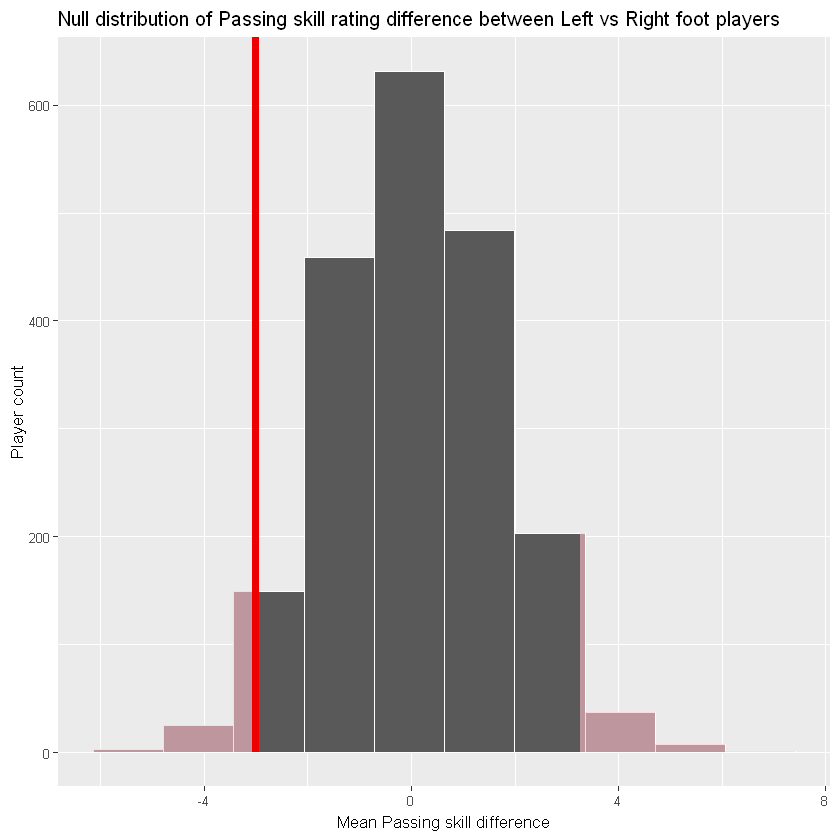

In [78]:
# Helper function for null visualization
plot_null_dist <- function(null_model, obs_stat, skill_name) {
  null_model |>
    visualize(bins = 10) +
    shade_p_value(obs_stat = obs_stat, direction = "both") +
    xlab(paste("Mean", skill_name, "skill difference")) +
    ylab("Player count") +
    ggtitle(paste("Null distribution of", skill_name, "skill rating difference between Left vs Right foot players")) +
    theme(text = element_text(size=10))
}

null_passing_vis <- plot_null_dist(null_model_passing, passing_obs_diff, "Passing")
null_passing_vis

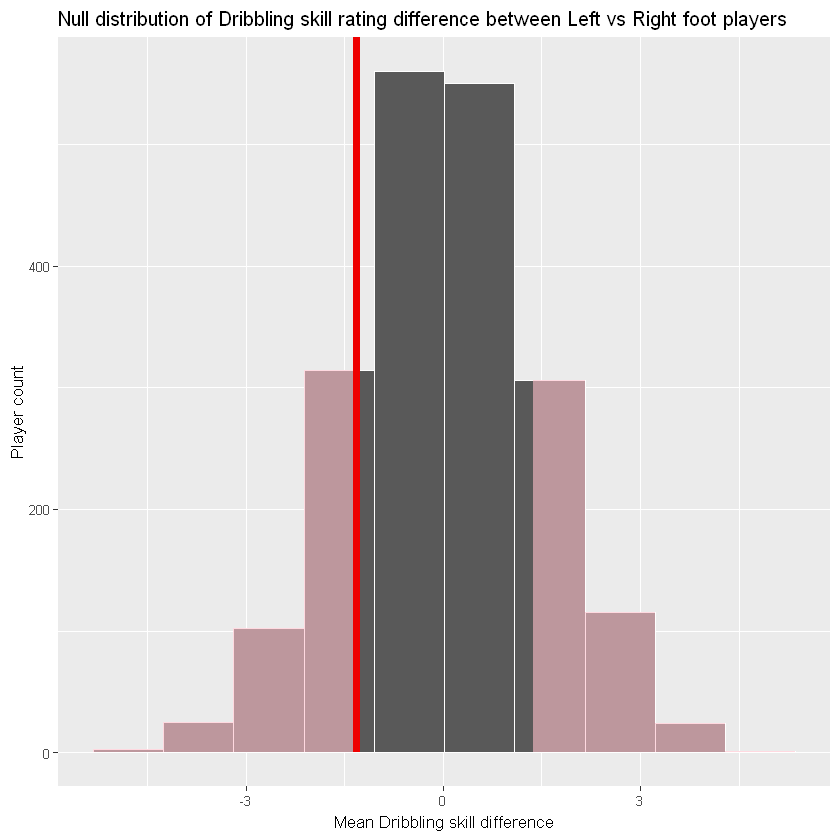

In [79]:
null_dribbling_vis <- plot_null_dist(null_model_dribbling, dribbling_obs_diff, "Dribbling")
null_dribbling_vis

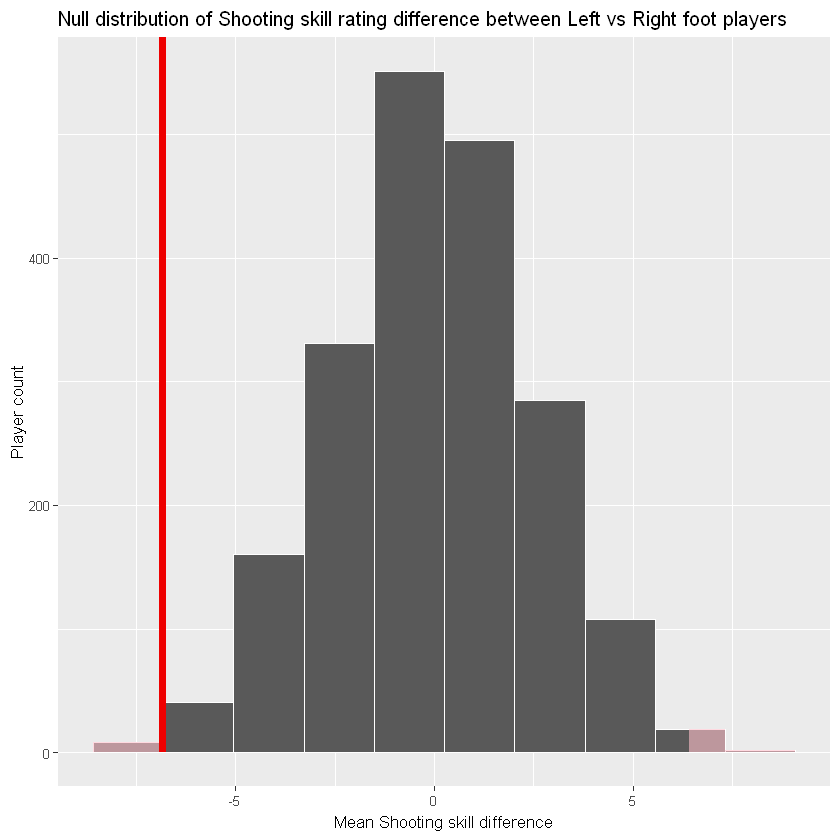

In [80]:
null_shooting_vis <- plot_null_dist(null_model_shooting, shooting_obs_diff, "Shooting")
null_shooting_vis

The only p-value that falls below our chosen significance level (a = 0.05) is that of mean shooting skill difference. This means that out of all three skills, only for shooting does the preferred foot of the player have a significant impact on skill. As a result, we would reject the null hypothesis for mean shooting skill difference as it was not equal, and conclude that the alternative hypothesis is true. In this case, we could be making a type I error. For the other two skills, dribbling and passing, we accept the null hypothesis and conclude that there is no significant difference between the skill level of right- and left-footed players because the p-value is greater than the sigificance level. In this case, we might be making a type II error.

# Test Using Each Individual Position

**Dribbling**

In [81]:
# Helper function for calculating position-based test stats
calc_position_test_stats <- function(data, skill_var, positions = c("LW", "RW", "ST")) {
  players <- filter_players_by_foot(data)
  left_players <- players$left
  right_players <- players$right
  
  left_stats <- left_players |> 
    group_by(team_position) |> 
    summarize(sample_mean_l = mean(.data[[skill_var]]), 
              std_l = sd(.data[[skill_var]]), 
              n_l = n()) |> 
    filter(team_position %in% positions)
  
  right_stats <- right_players |> 
    group_by(team_position) |> 
    summarize(sample_mean_r = mean(.data[[skill_var]]), 
              std_r = sd(.data[[skill_var]]), 
              n_r = n()) |> 
    filter(team_position %in% positions)
  
  merge(left_stats, right_stats) |>
    mutate(x_bar = sample_mean_r - sample_mean_l, 
           z = x_bar / sqrt(std_r^2 / n_r + std_l^2 / n_l)) |>
    select(team_position, x_bar, z) |>
    mutate(p = pnorm(abs(z), lower.tail = FALSE))
}

test_stats_dribbling <- calc_position_test_stats(single_sample_fifa, "skill_dribbling")
test_stats_dribbling

team_position,x_bar,z,p
<chr>,<dbl>,<dbl>,<dbl>
LW,3.575251,1.6911097,0.045407923
RW,-6.219828,-2.6631265,0.003870915
ST,1.544318,0.6239325,0.266335942


In [82]:
# Helper function for creating position-based null models and visualizations
create_position_null_models <- function(data, skill_var, skill_name, test_stats, positions = c("LW", "RW", "ST"), reps = 2000) {
  results <- list()
  
  for (pos in positions) {
    # Create null model for this position
    null_model <- data |>
      filter(team_position == pos) |>
      specify(formula = as.formula(paste(skill_var, "~ preferred_foot"))) |>
      hypothesise(null = "independence") |>
      generate(type = "permute", reps = reps) |>
      calculate(stat = "diff in means", order = c("Right", "Left"))
    
    # Get observed statistic for this position
    obs_stat <- (test_stats |> filter(team_position == pos))$x_bar
    
    # Create visualization
    plot <- null_model |>
      visualize(bins = 10) +
      shade_p_value(obs_stat = obs_stat, direction = "both") +
      xlab(paste("Mean", skill_name, "skill difference in", pos, "Position")) +
      ylab("Player count") +
      ggtitle(paste("Null distribution of", skill_name, "skill rating difference between Left vs Right foot", pos, "players")) +
      theme(text = element_text(size=10))
    
    results[[pos]] <- list(null_model = null_model, plot = plot)
  }
  
  return(results)
}

dribbling_results <- create_position_null_models(single_sample_fifa, "skill_dribbling", "Dribbling", test_stats_dribbling)
null_model_dribble_LW <- dribbling_results$LW$null_model
null_model_dribble_RW <- dribbling_results$RW$null_model
null_model_dribble_ST <- dribbling_results$ST$null_model
null_dribbling_LW <- dribbling_results$LW$plot
null_dribbling_RW <- dribbling_results$RW$plot
null_dribbling_ST <- dribbling_results$ST$plot

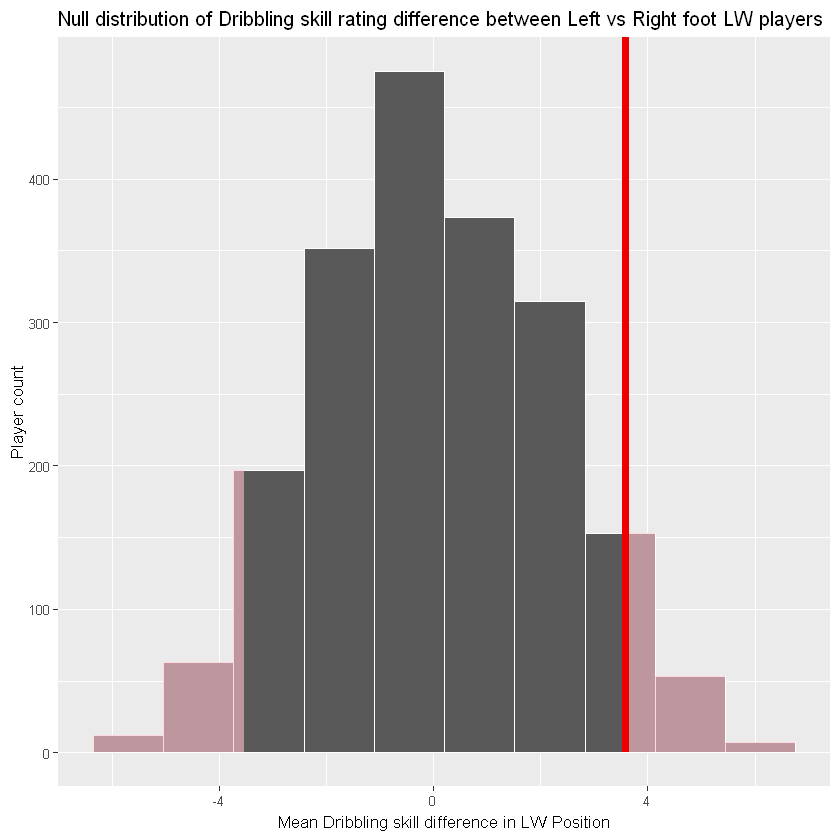

In [83]:
null_dribbling_LW

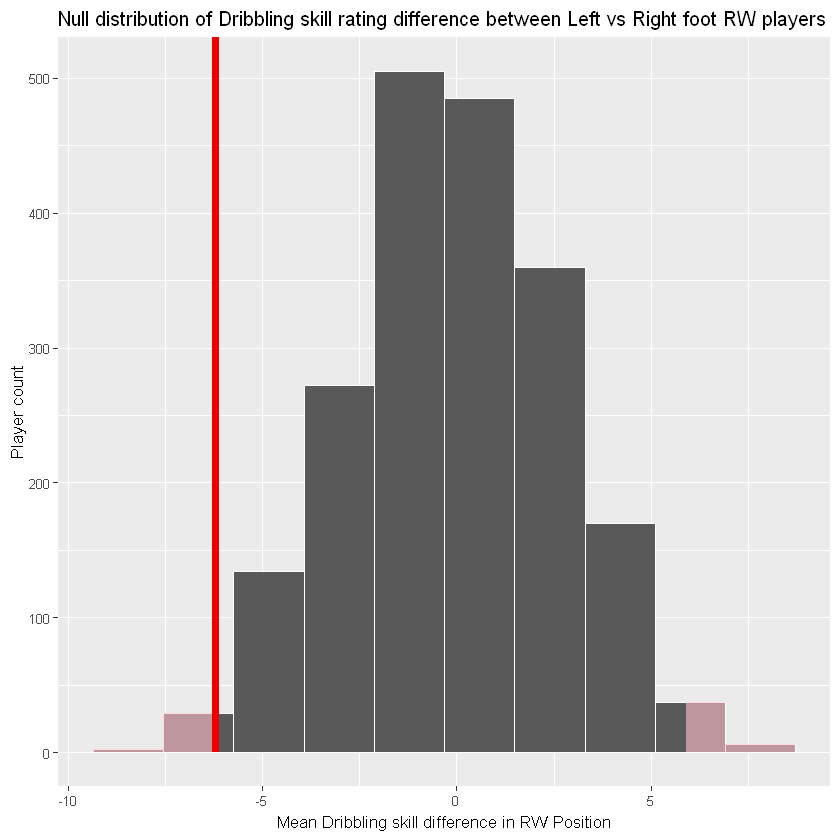

In [84]:
null_dribbling_RW

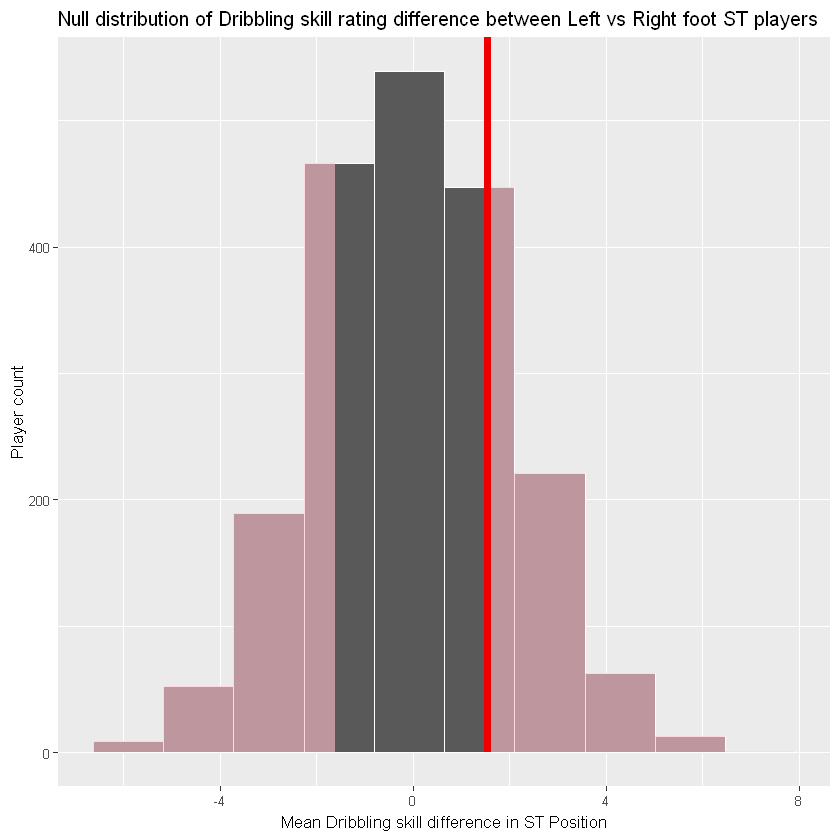

In [86]:
null_dribbling_ST

**Passing**

In [87]:
test_stats_passing <- calc_position_test_stats(single_sample_fifa, "passing")
test_stats_passing

team_position,x_bar,z,p
<chr>,<dbl>,<dbl>,<dbl>
LW,1.4581940,0.65692200,0.25561553
RW,-8.3577586,-2.11324620,0.01728985
ST,0.1784091,0.07360522,0.47066226


In [88]:
passing_results <- create_position_null_models(single_sample_fifa, "passing", "Passing", test_stats_passing)
null_model_passing_LW <- passing_results$LW$null_model
null_model_passing_RW <- passing_results$RW$null_model
null_model_passing_ST <- passing_results$ST$null_model
null_passing_LW <- passing_results$LW$plot
null_passing_RW <- passing_results$RW$plot
null_passing_ST <- passing_results$ST$plot

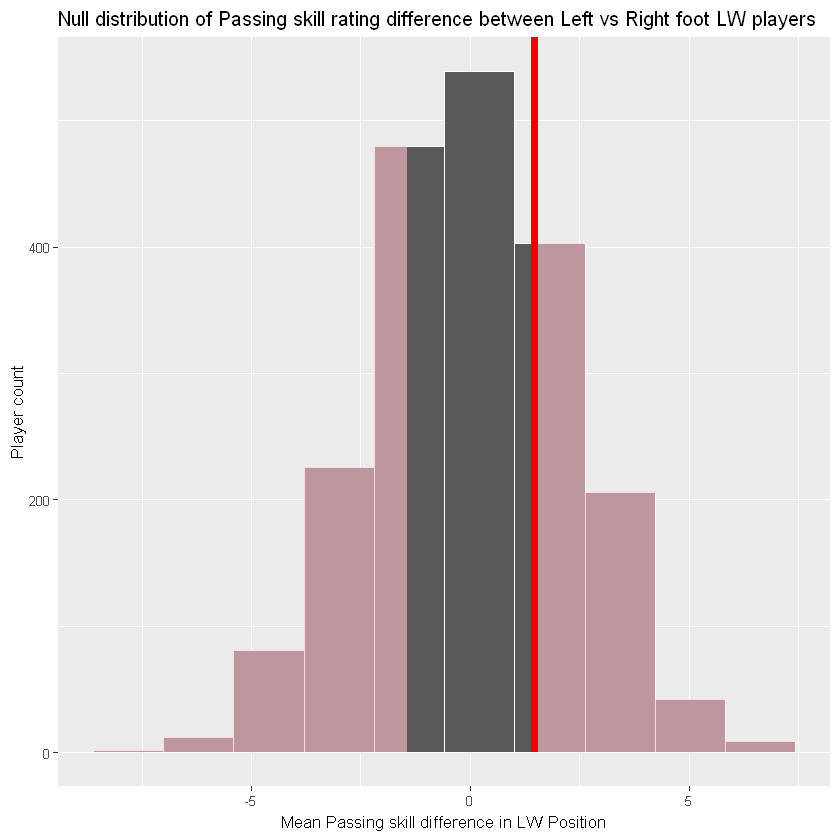

In [89]:
null_passing_LW

In [90]:
# Wilcoxon Rank Sum Test for Passing by Position
wilcoxon_passing_by_position <- wilcoxon_test_by_position(single_sample_fifa, "passing", "Passing")
wilcoxon_passing_by_position

team_position,response,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>
LW,Passing LW,167.5,0.56301357
RW,Passing RW,68.0,0.07924839
ST,Passing ST,885.0,0.97366509


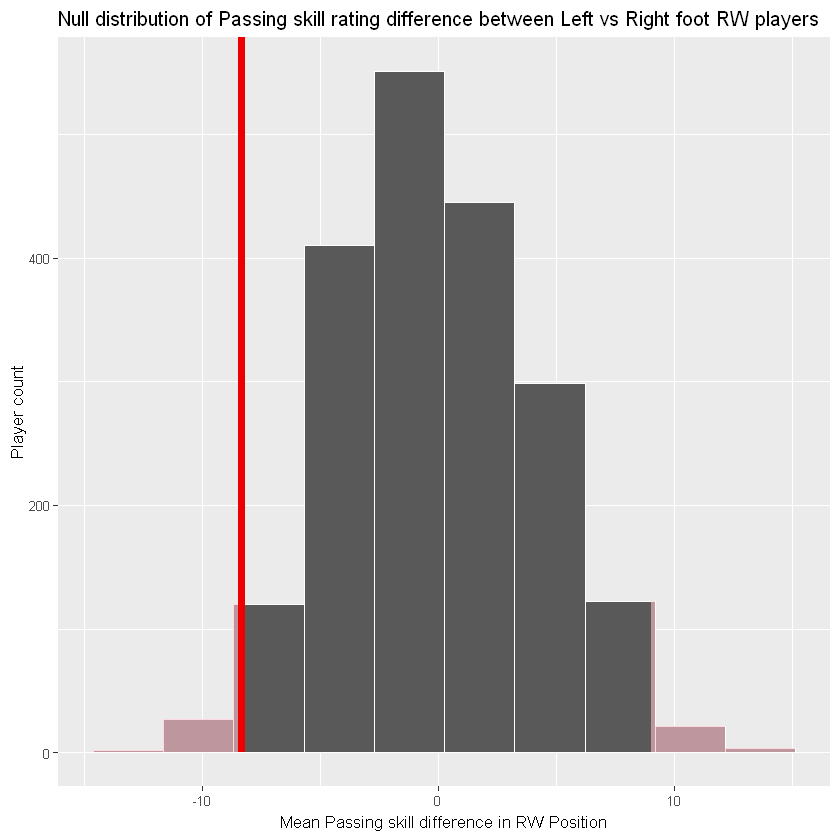

In [91]:
null_passing_RW

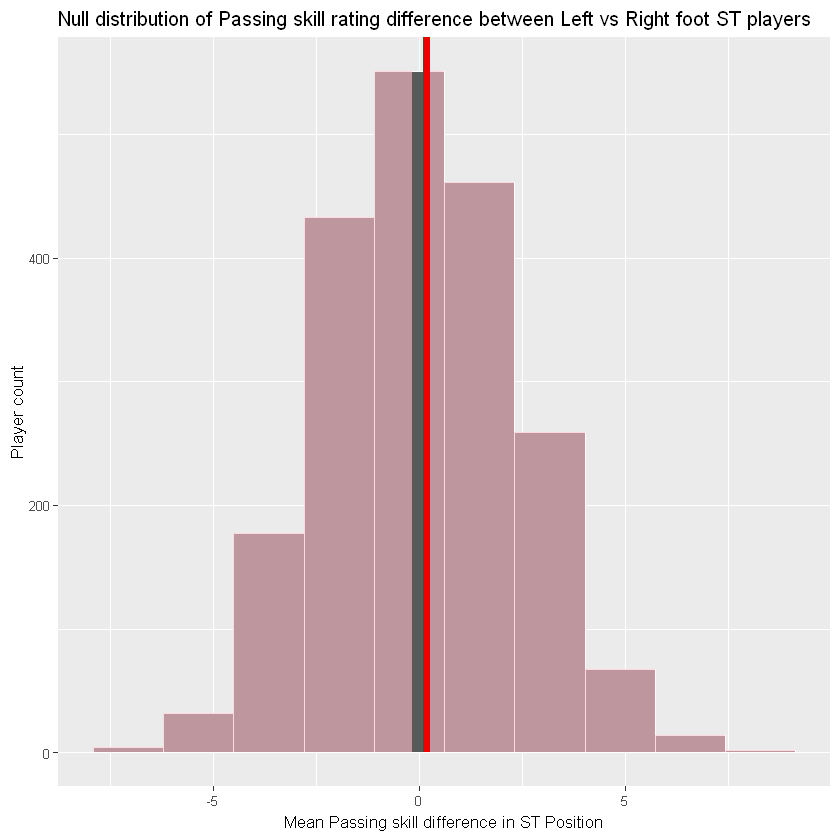

In [92]:
null_passing_ST

**Shooting**

In [93]:
test_stats_shooting <- calc_position_test_stats(single_sample_fifa, "skill_fk_accuracy")
test_stats_shooting

team_position,x_bar,z,p
<chr>,<dbl>,<dbl>,<dbl>
LW,-3.418060,-0.7484027,0.22710865
RW,-8.875000,-1.5329245,0.06264723
ST,-3.485227,-1.0580506,0.14501618


In [94]:
shooting_results <- create_position_null_models(single_sample_fifa, "skill_fk_accuracy", "Shooting", test_stats_shooting)
null_model_shooting_LW <- shooting_results$LW$null_model
null_model_shooting_RW <- shooting_results$RW$null_model
null_model_shooting_ST <- shooting_results$ST$null_model
null_shooting_LW <- shooting_results$LW$plot
null_shooting_RW <- shooting_results$RW$plot
null_shooting_ST <- shooting_results$ST$plot

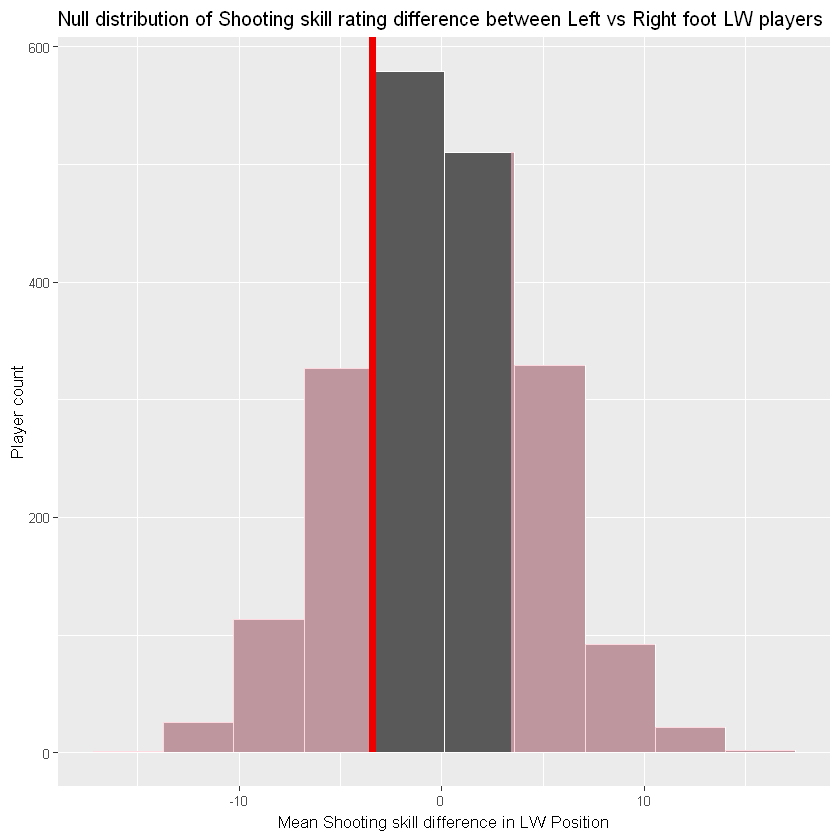

In [95]:
null_shooting_LW

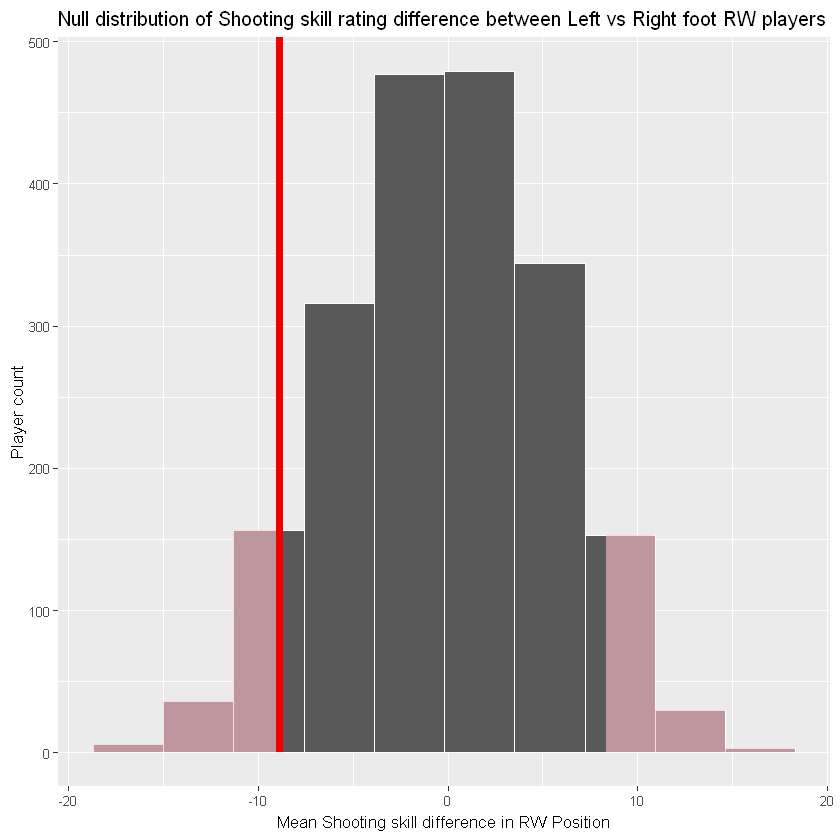

In [96]:
null_shooting_RW

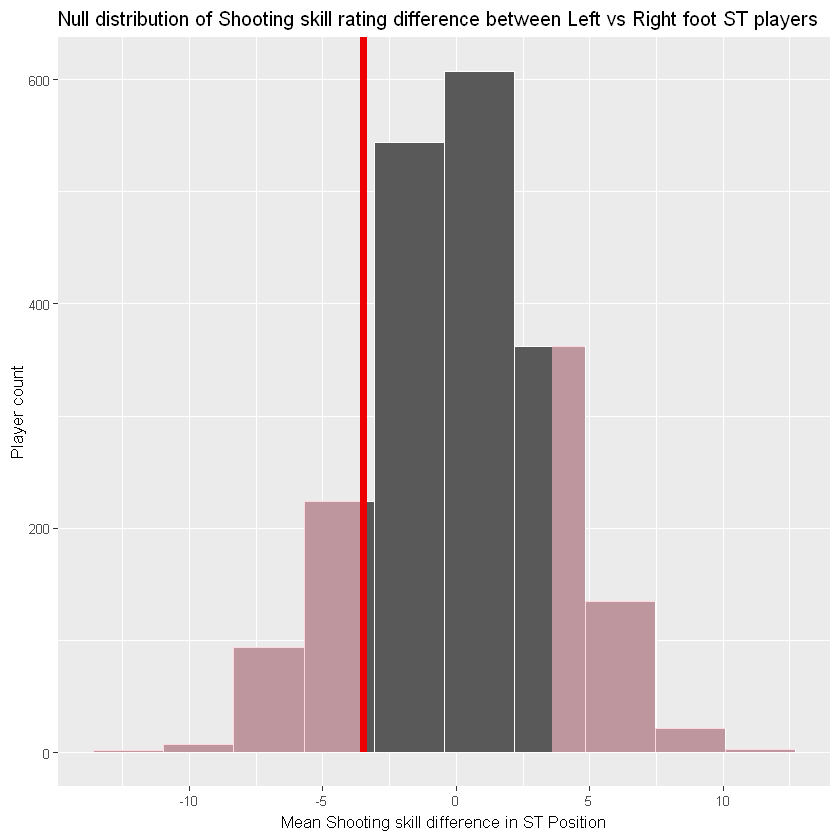

In [97]:
null_shooting_ST

<h2> Wilcoxon Rank Sum Test </h2>

<p> For non-normal cases. We will further check if the conclusions match with our original ones. If it's true, we can ensure that our data is normal. We clearly expect this to hold true, as we took n = 200 samples. </p>

In [107]:
# Wilcoxon Rank Sum Test for Dribbling by Position
# Helper function for position-based Wilcoxon tests
wilcoxon_test_by_position <- function(data, skill_var, skill_name, positions = c("LW", "RW", "ST")) {
  players <- filter_players_by_foot(data)
  left_players <- players$left
  right_players <- players$right
  
  results <- list()
  
  for (pos in positions) {
    left_pos <- left_players |> filter(team_position == pos)
    right_pos <- right_players |> filter(team_position == pos)
    
    if (nrow(left_pos) > 0 && nrow(right_pos) > 0) {
      test_result <- wilcoxon_test(
        right_pos[[skill_var]], 
        left_pos[[skill_var]], 
        paste(skill_name, pos)
      )
      test_result <- test_result |>
        mutate(team_position = pos) |>
        select(team_position, response, statistic, p.value)
      results[[pos]] <- test_result
    }
  }
  
  return(bind_rows(results))
}

wilcoxon_dribbling_by_position <- wilcoxon_test_by_position(single_sample_fifa, "skill_dribbling", "Dribbling")
wilcoxon_dribbling_by_position

team_position,response,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>
LW,Dribbling LW,215.5,0.030298604
RW,Dribbling RW,45.0,0.009058099
ST,Dribbling ST,950.5,0.607582729


In [ ]:
# Non-parametric test: Wilcoxon Rank Sum Test (Mann-Whitney U Test)
# This is a non-parametric alternative to the two-sample t-test
# It tests whether two independent samples come from populations with the same distribution
# H0: The distributions of the two groups are identical
# H1: The distributions of the two groups differ

# Helper function for Wilcoxon rank sum test
wilcoxon_test <- function(a, b, skill_name) {
  result <- broom::tidy(wilcox.test(x = a,
                                    y = b,
                                    alternative = "two.sided",
                                    paired = FALSE,
                                    exact = FALSE)) |>
    mutate(response = skill_name)
  return(result)
}

# Perform Wilcoxon rank sum tests for all three skills
wilcoxon_results <- rbind(
  wilcoxon_test(right_players$passing, left_players$passing, "Passing Skills Difference"),
  wilcoxon_test(right_players$skill_dribbling, left_players$skill_dribbling, "Dribbling Skills Difference"),
  wilcoxon_test(right_players$skill_fk_accuracy, left_players$skill_fk_accuracy, "Shooting Accuracy Difference")
) |>
  select(response, statistic, p.value)

wilcoxon_results

# Compare t-test and Wilcoxon test results
comparison_results <- t_test_results |>
  select(response, t_test_p.value = p.value) |>
  left_join(wilcoxon_results |> select(response, wilcoxon_p.value = p.value), by = "response") |>
  mutate(
    t_test_significant = ifelse(t_test_p.value < 0.05, "Yes", "No"),
    wilcoxon_significant = ifelse(wilcoxon_p.value < 0.05, "Yes", "No"),
    conclusion_match = ifelse(t_test_significant == wilcoxon_significant, "Yes", "No")
  ) |>
  select(response, t_test_p.value, wilcoxon_p.value, t_test_significant, wilcoxon_significant, conclusion_match)

comparison_results


In [108]:
# Monte Carlo Simulation: Loop through tests 100 times with n=200 samples
# This will check if Wilcoxon test conclusions match the two-sample t-test conclusions
# For each iteration, we perform both tests and compare their conclusions

set.seed(3000)  # Set seed for reproducibility of the simulation
n_iterations <- 100
n_sample <- 200

# Helper function for t-test (same as defined earlier)
t_test <- function(a, b, c) {
  return (
    broom::tidy(t.test(x = a,
           y = b,
           alternative = "two.sided",
           paired = FALSE)) |>
    mutate(response = c)
  )
}

# Storage for results
overall_matches <- numeric(n_iterations)
position_matches <- numeric(n_iterations)

# Loop through 100 iterations
for (i in 1:n_iterations) {
  # Generate new sample of size 200 for each iteration
  set.seed(3000 + i)  # Different seed for each iteration
  sample_iter <- fifa_tidy |>
                 rep_sample_n(size = n_sample)
  
  # Filter players by foot
  players_iter <- filter_players_by_foot(sample_iter)
  left_iter <- players_iter$left
  right_iter <- players_iter$right
  
  # Overall t-tests for this iteration
  t_test_iter <- tryCatch({
    rbind(
      t_test(right_iter$passing, left_iter$passing, "Passing"),
      t_test(right_iter$skill_dribbling, left_iter$skill_dribbling, "Dribbling"),
      t_test(right_iter$skill_fk_accuracy, left_iter$skill_fk_accuracy, "Shooting")
    ) |>
      select(response, p.value)
  }, error = function(e) NULL)
  
  # Overall Wilcoxon tests for this iteration
  wilcoxon_iter <- tryCatch({
    rbind(
      wilcoxon_test(right_iter$passing, left_iter$passing, "Passing"),
      wilcoxon_test(right_iter$skill_dribbling, left_iter$skill_dribbling, "Dribbling"),
      wilcoxon_test(right_iter$skill_fk_accuracy, left_iter$skill_fk_accuracy, "Shooting")
    ) |>
      select(response, p.value)
  }, error = function(e) NULL)
  
  # Compare overall conclusions between t-test and Wilcoxon
  if (!is.null(t_test_iter) && !is.null(wilcoxon_iter)) {
    comparison_iter <- t_test_iter |>
      select(response, p.value) |>
      rename(t_test_p.value = p.value) |>
      left_join(
        wilcoxon_iter |>
          select(response, p.value) |>
          rename(wilcoxon_p.value = p.value),
        by = "response"
      ) |>
      mutate(
        t_test_significant = ifelse(t_test_p.value < 0.05, "Yes", "No"),
        wilcoxon_significant = ifelse(wilcoxon_p.value < 0.05, "Yes", "No"),
        match = ifelse(t_test_significant == wilcoxon_significant, 1, 0)
      )
    
    # Check if ALL conclusions match (all 3 skills)
    overall_matches[i] <- ifelse(all(comparison_iter$match == 1), 1, 0)
    
    # Position-based tests
    tryCatch({
      # Position-based t-tests
      t_test_pos_list <- list()
      for (pos in c("LW", "RW", "ST")) {
        left_pos <- left_iter |> filter(team_position == pos)
        right_pos <- right_iter |> filter(team_position == pos)
        if (nrow(left_pos) > 0 && nrow(right_pos) > 0) {
          t_test_pos_list[[length(t_test_pos_list) + 1]] <- t_test(right_pos$skill_dribbling, left_pos$skill_dribbling, "Dribbling") |> mutate(skill = "Dribbling", team_position = pos) |> select(skill, team_position, p.value)
          t_test_pos_list[[length(t_test_pos_list) + 1]] <- t_test(right_pos$passing, left_pos$passing, "Passing") |> mutate(skill = "Passing", team_position = pos) |> select(skill, team_position, p.value)
          t_test_pos_list[[length(t_test_pos_list) + 1]] <- t_test(right_pos$skill_fk_accuracy, left_pos$skill_fk_accuracy, "Shooting") |> mutate(skill = "Shooting", team_position = pos) |> select(skill, team_position, p.value)
        }
      }
      t_test_pos_iter <- bind_rows(t_test_pos_list)
      
      # Position-based Wilcoxon tests
      wilcoxon_pos_iter <- bind_rows(
        wilcoxon_test_by_position(sample_iter, "skill_dribbling", "Dribbling") |> mutate(skill = "Dribbling"),
        wilcoxon_test_by_position(sample_iter, "passing", "Passing") |> mutate(skill = "Passing"),
        wilcoxon_test_by_position(sample_iter, "skill_fk_accuracy", "Shooting") |> mutate(skill = "Shooting")
      ) |>
        select(skill, team_position, p.value)
      
      if (nrow(t_test_pos_iter) > 0 && nrow(wilcoxon_pos_iter) > 0) {
        pos_comparison <- t_test_pos_iter |>
          select(skill, team_position, p.value) |>
          rename(t_test_p.value = p.value) |>
          left_join(
            wilcoxon_pos_iter |>
              select(skill, team_position, p.value) |>
              rename(wilcoxon_p.value = p.value),
            by = c("skill", "team_position")
          ) |>
          mutate(
            t_test_significant = ifelse(t_test_p.value < 0.05, "Yes", "No"),
            wilcoxon_significant = ifelse(wilcoxon_p.value < 0.05, "Yes", "No"),
            match = ifelse(t_test_significant == wilcoxon_significant, 1, 0)
          )
        
        # Check if ALL position-based conclusions match (all 9 combinations)
        position_matches[i] <- ifelse(all(pos_comparison$match == 1, na.rm = TRUE), 1, 0)
      } else {
        position_matches[i] <- NA
      }
    }, error = function(e) {
      position_matches[i] <- NA
    })
  } else {
    overall_matches[i] <- NA
    position_matches[i] <- NA
  }
  
  # Progress indicator
  if (i %% 10 == 0) {
    cat("Completed", i, "iterations\n")
  }
}

# Calculate proportions (out of 100 iterations, how many had all conclusions match)
overall_match_proportion <- mean(overall_matches, na.rm = TRUE)
position_match_proportion <- mean(position_matches, na.rm = TRUE)

# Count iterations with all matches
n_overall_matched <- sum(overall_matches == 1, na.rm = TRUE)
n_position_matched <- sum(position_matches == 1, na.rm = TRUE)
n_overall_total <- sum(!is.na(overall_matches))
n_position_total <- sum(!is.na(position_matches))

# Create summary results
simulation_results <- tibble(
  test_type = c("Overall Tests (3 skills)", "Position-based Tests (9 combinations)"),
  n_iterations = c(n_iterations, n_iterations),
  n_matched = c(n_overall_matched, n_position_matched),
  n_total = c(n_overall_total, n_position_total),
  proportion_matched = c(overall_match_proportion, position_match_proportion),
  percentage_matched = c(round(overall_match_proportion * 100, 2), round(position_match_proportion * 100, 2))
)

simulation_results

# Detailed statistics
cat("\n=== Monte Carlo Simulation Results (100 iterations, n=200 per iteration) ===\n")
cat("Comparing Wilcoxon Rank Sum Test vs Two-Sample t-test conclusions\n")
cat("\nOverall Tests (3 skills: Passing, Dribbling, Shooting):\n")
cat("  Iterations with ALL conclusions matching between t-test and Wilcoxon:", n_overall_matched, "out of", n_overall_total, "\n")
cat("  Proportion of matched conclusions:", round(overall_match_proportion * 100, 2), "%\n")
cat("\nPosition-based Tests (9 combinations: 3 skills × 3 positions):\n")
cat("  Iterations with ALL conclusions matching between t-test and Wilcoxon:", n_position_matched, "out of", n_position_total, "\n")
cat("  Proportion of matched conclusions:", round(position_match_proportion * 100, 2), "%\n")
cat("\nNote: 'Matched' means ALL test conclusions (significant/not significant) agreed between the two-sample t-test and Wilcoxon rank sum test for each iteration's sample (n=200).\n")

Completed 10 iterations
Completed 20 iterations
Completed 30 iterations
Completed 40 iterations
Completed 50 iterations
Completed 60 iterations
Completed 70 iterations
Completed 80 iterations
Completed 90 iterations
Completed 100 iterations


test_type,n_iterations,n_matched,n_total,proportion_matched,percentage_matched
<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>
Overall Tests (3 skills),100,77,100,0.77,77
Position-based Tests (9 combinations),100,63,100,0.63,63



=== Monte Carlo Simulation Results (100 iterations, n=200 per iteration) ===
Comparing Wilcoxon Rank Sum Test vs Two-Sample t-test conclusions

Overall Tests (3 skills: Passing, Dribbling, Shooting):
  Iterations with ALL conclusions matching between t-test and Wilcoxon: 77 out of 100 
  Proportion of matched conclusions: 77 %

Position-based Tests (9 combinations: 3 skills × 3 positions):
  Iterations with ALL conclusions matching between t-test and Wilcoxon: 63 out of 100 
  Proportion of matched conclusions: 63 %

Note: 'Matched' means ALL test conclusions (significant/not significant) agreed between the two-sample t-test and Wilcoxon rank sum test for each iteration's sample (n=200).


<h2> 4. References </h2>


*   **ESPN Football**, Tor-Kristian Karlsen: *Why does every club want a left-footed centre-back, and who is the best around?* (Oct 21, 2022) https://www.espn.co.uk/football/story/_/id/37633113/why-does-every-club-want-sign-left-footed-centre-back .

*  **Medium**, Harun Ahmetbeyoglu: *Are left-footed footballers earning more? And they are more valuable than right-footed footballers? Investigation of this popular myth and bias.* (July 31, 2022) https://medium.com/@harun.ahmetbeyoglu/are-left-footed-footballers-earning-more-fde9b932912f .


* **SoccerNovo**, *Left Footed Soccer Players: Is There an Advantage?* (2020) https://soccernovo.com/left-footed-soccer-players/ .




